# CS-EJ3311 - Deep Learning with Python, 09.09.2020-18.12.2020

## Round 5 -Transfer Learning

S. Abdurakhmanova, B. Karki, J.P. Bartaula and A. Jung

Aalto University (Espoo, Finland)  
fitech.io (Finland)

Assume you want to build an app that distinguishes between different dog breeds (see this [overview](https://dogtime.com/dog-breeds/profiles)). This can be modeled as a classification problem which we can solve using a deep neural network. Indeed, we could train a deep neural network to predict the dog breed based on a large set of labeled images. The problem is that the amount of labeled images required for accurate training scales with the number of weights (and bias terms) of the deep net. It might well be that we do not have enough training images for some (rare) breeds.

The idea of transfer learning is to exploit similarities between different machine learning problems. Loosely speaking, transfer learning allows to borrow statistical power from related problems for which we can collect more labeled data than for the ("target") problem at hand. 

For the dog breed classification problem, such a similar problem could be the classification of images as dog or cat (see Round 4). We might have access to large image databases of dog and cat images so we can reliably tune the weights of a deep net. If we have found weights for a deep net that allow to distinguish between dog and cat images, it might be a good starting point for adjusting the weights to further distinguish between different dog breeds. 


## Learning goals

- to understand transfer learning and motivation for using it
- to learn main transfer learning strategies
- to learn how to use transfer learning with pre-trained CNN models

## Recommended Reading

-   [Chapter 5.3](https://livebook.manning.com/book/deep-learning-with-python/chapter-5/152) of "Deep Learning with Python" by F. Chollet. 


## Additional Material (Optional!)

- [A comprehensive guide to Transfer Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)
- [A Survey on Transfer Learning](https://www.cse.ust.hk/~qyang/Docs/2009/tkde_transfer_learning.pdf)
- [Transfer Learning, Andrew Ng](https://www.youtube.com/watch?v=yofjFQddwHE)

 # What is Transfer Learning ?
 
Transfer learning is a machine learning technique in which model trained for one particular task is used as a starting point for training model for another task. Transfer learning enables us to utilize the knowledge (such as learned weights, features) from previously learned tasks and apply it to the new, but related task.  \
For example, for image classification task certain low-level features, such as edges, shapes, corners and intensity, do not appears to be specific to a particular dataset or particular task. Such learned features can be shared across different image classification problems, thus enabling knowledge transfer among them. Following figure demonstrates the difference between traditional machine learning and transfer learning.

<figure> <img src="Transfer_learning.png" width=800 alt="drawing"/ align='middle'/></figure>

<figcaption style="text-align:center" ><a href=https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a > Image source </figcaption>

# Why Transfer Learning ?
Deep learning models are data-hungry - they need many training examples to learn the parameters of the network. This is one of the limiting aspects of deep neural networks and that is why the transfer learning comes in handy. Transfer learning is a common and highly effective approach to train the model on a small image dataset by  utilising **pre-trained models**.  Furthermore, transfer learning helps to save the training time, because the model is not trained from scratch. 

**Pre-trained model** is a deep learning architecture which is trained over a large dataset. Such models are trained for thousands of hours for a given benchmark dataset and all the parameters in the networks are learned. There are numbers of such pre-trained models available and anyone can use them depending on the particular problem. 

Few examples of pre-trained models are:

- **For Computer Vision tasks**
    - VGG-16
    - VGG-19
    - Inception V3
    - XCeption
    - ResNet-50
    - MobileNet

- **For Natural Language Processing task**
    - Word2Vec
    - GloVe
    - FastText
    - Universal Sentence Encoder by Google
    - Bidirectional Encoder Representations from Transformers (BERT) by Google

# Key considerations for Transfer Learning

To effectively apply transfer learning we need to answer three main questions:

-  **What to transfer**: While applying transfer learning we need to understand what knowledge is common between the source and target task. We try to seek answer on what knowledge is specific to source task and what can be transferred from source task to target task that will help improve the performance of the target task. 
-  **When to transfer**: We should apply transfer learning only when source and target domain are related. When  source and target domains are not related at all, applying transfer learning degrades target task performance. This type of transfer is called Negative Transfer. 
- **How to transfer**: Once we have answer to what to transfer and when to transfer, we can proceed to identify the actual ways of transferring the knowledge across domains/tasks. 

**So, when does transfer learning makes sense?** 

If we are trying to learn from **Task A** and transfer knowledge to **Task B**, transfer learning is useful in following scenario:
- Task A and B have same input x, e.g both have images as input. 
- There is alot more data for Task A than Task B.
- Low level features from A could be helpful in for learning task B.

# Transfer Learning Strategies
There are two common ways to use pre-trained models:

1. To use pre-trained model as a feature extractor
2. To fine-tune the pre-trained model 

### Pre-trained Models as a Feature Extractors

As we saw in Round 3, convolutional neural network consists of two parts: first part being the series of  convolutional and pooling layers and second part being densely connected layers. The first part is called **convolutional base**. The main idea of using pre-trained model as feature extractor is to remove a fully connected layer of pre-trained model and use only convolutional base to extract the features from new images.\
These extracted features will be used to train a new classifier for a new task. In this case, we do not retrain pre-trained model or part of it (this is called **freezing** the network), but only train few top dense layers. In other words, the model will only have to learn the weights of the few new dense layers, that are on the top of pre-trained model.\
Figure below demonstrates the concept of feature extraction from pre-trained model and following training of a classifier on top of it. \
For example, if we have a pre-trained model trained on source data like ImageNet database (over 14 million images), we chop off the densely connected layer and use this convolutional base to extract the feature from target data (i.e data for new classification task). Specifically, this means to use the output of convolutional base for training the new (target) model. \
$ $
<figure>
    <img src="feature_extract.png" alt="drawing"/ align='middle'/>
</figure>


###  Fine-tuning the pre-trained model 
In this case we do not just replace and retrain the classifier head, i.e fully connected layers, but we also selectively re-train some of the top layers used for feature extraction in pre-trained model. This process is called **fine-tuning** because it slightly adjusts the more abstract representations of the pre-trained model, in order to make them relevant for the problem at hand.\
$ $
<figure>
    <img src="fine_tune.png" alt="drawing"/ align='middle'/>
</figure>

### Deciding which transfer learning strategy to use 
Two different transfer learning strategies were presented above. But how do we decide which one to use? The decision is based on two factors: the size of the target (new) dataset (small or big), and its similarity to the source (original) dataset (e.g. ImageNet). Let's discuss four common scenarios and how to navigate among them when choosing  transfer learning strategy.

**1. size of target dataset is small and similar to source dataset:** In this case, since the size of the new dataset is low, fine tuning can lead to overfitting. As target data is similar to source data, we use the pre-trained model as a feature extractor while changing the output layer according to the new classification task.

**2. Size of the target dataset is small and dissimilar to source data:** In this case we fine tune last layers (including some layers of the convolutional block) while freezing the top layers.


**3.Size of the target dataset is large and similar to source data:** In such scenario, the best option would be to fine tune through the complete network of pre-trained model with a small learning rate. Since the target dataset is large, there is less concern of overfitting.


**4.Size of the target dataset is large and dissimilar to source data:** Since the target dataset is large, we can  train the neural network from scratch according to our data. However, in practice it is very often still beneficial to initialize with weights from a pre-trained model.


# Implementing Transfer Learning with Pre-trained CNN Model

We will be using  <a href = 'https://arxiv.org/pdf/1409.1556.pdf'>VGG-16</a> pre-trained model, created by the Visual Geometry Group at the University of Oxford, which specializes in building very deep convolutional networks for large-scale visual recognition.
We will implement both transfer learning strategies, i.e 
- Using a pre-trained model as a feature extractor
- Fine tuning the pre-trained model
    
First, let's have a quick introduction of VGG-16 pre-trained model. 

### VGG-16 model
 
The VGG-16 model is a 16-layer (convolution and fully connected) network built on the **ImageNet** database. ImageNet (<a href='http://www.image-net.org/challenges/LSVRC/'> ImageNet Large Scale Visual Recognition Challenge</a> , or ILSVRC for short) is a image classification challenge where the goal is to train a model that can correctly classify an input image into 1,000 separate object categories. VGG-16 model was built by Karen Simonyan and Andrew Zisserman and is mentioned in their paper  <a href='https://arxiv.org/abs/1409.1556'>"Very Deep Convolutional Networks for Large-Scale Image Recognition"</a>. This model was trained on ImageNet dataset (14 million labeled images and 1000 different classes). 
The architecture of the VGG-16 model is similar to what we used before, but much deeper with tens of thousands parameters.

<figure>
    <img src="vgg16.png" alt="drawing"/>
</figure>



### Dataset

Once again, we will use we will use part of the [Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765) used in the previous round.

In [5]:
# import Python packages and libraries

# provides functionality to train neural network
import tensorflow as tf

# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# function to preprocess input for futher feeding into VGG16 network
from tensorflow.keras.applications.vgg16 import preprocess_input

# provides mathematical functions to operate on arrays and matrices
import numpy as np

# library to interact with operating system
import os

# library for generating plots
import matplotlib.pyplot as plt

In [6]:
# The path to the dataset 
base_dir = '../../data/cats_and_dogs_small'

# Directories for training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with training cats and dogs pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cats and dogs pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with test cats and dogs pictures
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('training cat images:', len(os.listdir(train_cats_dir)))
print('training dog images:', len(os.listdir(train_dogs_dir)))

print('validation cat images:', len(os.listdir(validation_cats_dir)))
print('validation dog images:', len(os.listdir(validation_dogs_dir)))

print('test cat images:', len(os.listdir(test_cats_dir)))
print('test dog images:', len(os.listdir(test_dogs_dir)))

training cat images: 998
training dog images: 1000
validation cat images: 500
validation dog images: 497
test cat images: 500
test dog images: 500


# 1. Training VGG16 model from scratch

As a baseline we can try to train whole network from scratch. This is not optimal way to use such a huge model with around 16 million parameters, as it will take a lot of time. In addition, there is a big chance that network will overfit as we are training very large network on a small dataset.

**Note!!!** You do not need to run the training by yourself as it will take few hours, but if you are curious, you can run the whole network and try different optimizers, learning rate etc. to improve the predictions. You may also use less epochs to run.

**Note!** Input should be pre-proccesed before passing to the pre-trained VGG16 network.\
Previously we scaled images from 0-255 to 0-1, but as VGG16 network was trained on input scaled differently, we should pre-process our input in the same way. Specifically, VGG16 network was trained on zero-centered by mean pixel (rather than mean image) subtraction. Namely, the following BGR values should be subtracted: [103.939, 116.779, 123.68]. See the original paper for [more detail](https://arxiv.org/abs/1409.1556)

Readily available function `preprocess_input` can be imported from tensorflow:\
`from tensorflow.keras.applications.vgg16 import preprocess_input`\
\
and passed to `preprocessing_function` argument of `ImageDataGenerator` instance:\
`generator = ImageDataGenerator(preprocessing_function=preprocess_input)`

In [7]:
# set parameters for the data generators
# number of samples in a batch
batch_size = 32
# imput image size
IMG_HEIGHT = 150
IMG_WIDTH  = 150

In [8]:
# Augment training dataset
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_data_gen = train_datagen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='binary')

val_data_gen = valid_datagen .flow_from_directory(batch_size=batch_size,
                                                  directory=validation_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='binary')

Found 1997 images belonging to 2 classes.
Found 995 images belonging to 2 classes.


We can import pre-trained VGG16 model from Keras with `from tensorflow.keras.applications import VGG16`. \
There are few arguments passed to the constructor:

- **weights**, to specify which weight checkpoint to initialize the model from. We specified 'None'. This means we imported only architecture of VGG16 model without pre-trained weights. 
- **include_top**, which refers to include or not to include the densely-connected classifier on top of the network. When argument is set False, we chop off densly connected classifier from VGG16 model and retained only its convolutional base. 
- **input_shape**, the shape of the image tensors that we will feed to the network.

In [9]:
# load VGG16 model from keras
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights=None,
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH , 3))

In [10]:
# print summary of convolutional base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We can see that the last activation feature map (output from block5_pool)  in  VGG-16 model gives features (output) of shape (4,4,512). These features are then flattened and fed to our own fully connected deep neural network classifier to classify between "cat" and "dog" classes. Also, number of trainable parameters in convolutional base model is more than 14 million.

In [11]:
model = tf.keras.models.Sequential()

# add convolutional base as layer 
model.add(conv_base)

model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model 
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# # Uncomment if you want to run the training by yourself - approx. execution time ~2-3h on Colab GPU
# %%time

# # model training
# history = model.fit(train_data_gen,
#                     epochs=300,
#                     validation_data=val_data_gen)

In [14]:
# from plot_history import plot_history
# plot_history(history)

After training you should get the plot that looks similar to this:

$ $
<figure>
    <img src="R5_1.png" width=600/ align='middle'/>
</figure>

You can see that, first, it takes at least 200 epochs until learning reaches a plateau and ,second, the model is overfitting. The accuracy for the validation dataset is about 0.80-0.85, but the result is varying a lot.


# 2. Pre-trained VGG16 model as a feature extractor

Now we will make use of pre-trained VGG16 model and will use weights already learned during training on the Imagenet dataset. We need to modify the network slightly, as original input data for the network was 224x224 pixel images and our images are 150x150. We need to add new dense layers and train them with the current input.

There two main steps needed to ensemble the pre-trained model with image augmentation:
 - freeze the convolutional base
 - add the classification head
 
**Note!** If not using image augmentation, the fastest way is to use standalone convolutional base as feature extractor (generate predictions from pre-trained convolutional base) and feed these extracted features to the classification head (dense layers). This is much faster than passing all data through the network, but does not allow the use of image augmentation. See more in [Deep Learning with Python book](https://livebook.manning.com/book/deep-learning-with-python/chapter-5/158).

Note, that this time we imported convolutional base with argument `weights='imagenet'`.\
This means we imported VGG16 model with pre-trained weight derived from training over imagenet database. 

In [15]:
# load pre-trained model from keras
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(IMG_HEIGHT, IMG_WIDTH , 3))

**Freezing the convolutional base**\
In this step, we will freeze `conv_base` model defined previously. This ensures that weights of `conv_base` will not change during training of the model.
In Keras, freezing of a network is done by setting its `trainable` attribute to `False`.

In [16]:
conv_base.trainable = False

**Adding the classification head**\
Finally, we stack the dense layers on the top of the feature extractor.


In [17]:
model = tf.keras.models.Sequential()

# add convolutional base as layer 
model.add(conv_base)

model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

# display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


We can see that only the weights of the dense layers are trainable. All the weights associated with `conv_base` layers are now converted into `Non-trainable params`.

In [18]:
# compile the model 
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [19]:
%%time

# model training
history = model.fit(train_data_gen,
                    epochs=30,
                    validation_data=val_data_gen)

Train for 63 steps, validate for 32 steps
Epoch 1/30
63/63 [==============================] - 470s 7s/step - loss: 2.5314 - accuracy: 0.7326 - val_loss: 0.8337 - val_accuracy: 0.9065
Epoch 2/30
63/63 [==============================] - 475s 8s/step - loss: 1.1904 - accuracy: 0.8508 - val_loss: 0.6317 - val_accuracy: 0.9236
Epoch 3/30
63/63 [==============================] - 494s 8s/step - loss: 0.7935 - accuracy: 0.8888 - val_loss: 0.5917 - val_accuracy: 0.9377
Epoch 4/30
63/63 [==============================] - 450s 7s/step - loss: 0.7253 - accuracy: 0.9054 - val_loss: 0.6124 - val_accuracy: 0.9317
Epoch 5/30
63/63 [==============================] - 446s 7s/step - loss: 0.6455 - accuracy: 0.9114 - val_loss: 0.6102 - val_accuracy: 0.9357
Epoch 6/30
63/63 [==============================] - 441s 7s/step - loss: 0.6578 - accuracy: 0.9169 - val_loss: 0.4287 - val_accuracy: 0.9538
Epoch 7/30
63/63 [==============================] - 441s 7s/step - loss: 0.5496 - accuracy: 0.9209 - val_loss: 0

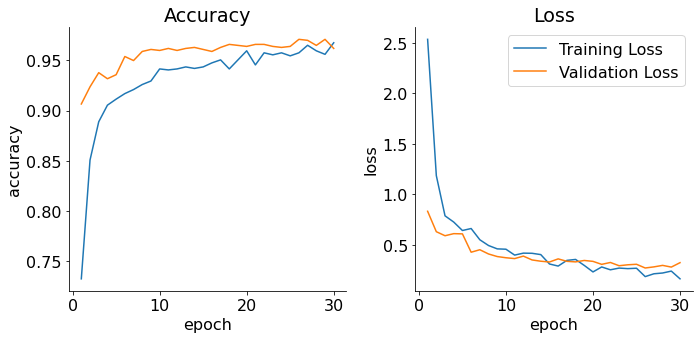

In [20]:
from plot_history import plot_history
plot_history(history)

After training you should get the plot that looks similar to this:

$ $
<figure>
    <img src="R5_2.png" width=600/ align='middle'/>
</figure>

We can see that using  pre-trained model did not prevent overfitting, but validation accuracy is increased from 0.85 to about 0.96. In addition, the validation accuracy and loss are much more stable than previously and the network is learning faster.

 # 3.  Fine-tuning 

First layers of the convolutional base encode more generic, reusable features like  texture, corners, edges and colour blobs, while layers higher up encode more specialized features like  eye, nose, cloth item etc. In order to improve performance of the model  even further we can train (or **fine-tune**) the weights of the top layers of the pre-trained model alongside with training of the classifier we've added. This training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset we are using. However, we should be careful in choosing how many layers of pre-trained model we want to fine-tune. Pre-trained model has millions of parameters, so more parameters we are training, the more we are at risk of overfitting the training data, especially if our dataset is small.\
Another important thing to remember is that classifier we will be using during fine-tuning should be already trained. If we will add untrained classifier on the top of the model and at the same time will unfreeze few layers of **conv_base**, the error propagating through the network will be too large and will destroy learnt features of unfreezed layers. This is an unwanted outcome, as our aim is to fine-tune (make small changes) the weights of convolutional base and not to learn them from the scratch.

Summarizing, the steps for fine-tuning the pre-trained model are:

1. Add classifier (dense layers) on the top of the pre-trained model
2. Freeze ALL layers of pre-trained model 
3. Train classifier
4. Unfreeze FEW layers of pre-trained model 
5. Train both, unfreezed layers of convolutional base and classifier

We've already trained our classifier, thus we just need to unfreeze few layers of convolutional base. Specifically, we will  unfreeze last four layers of VGG-16 model **conv_base** (three convolutional + one pool layers). To do so, we first need to unfreeze all layers by setting parameter `trainable` as `True`. Next, we will freeze all layers except last four.

In [21]:
# unfreeeze all layers
conv_base.trainable = True

# freeze all layers except the last 4 
for layer in conv_base.layers[:-4]:
    layer.trainable = False

We can confirm that `trainable` parameter is set correctly:

In [22]:
# print the trainable status of individual layers
for layer in conv_base.layers:   print(layer,"  ",  layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb005f8e390>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb005dd4090>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faffd6a7dd0>    False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb005dd49d0>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faffc82dd90>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb005fc0b10>    False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb005fd6ad0>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb005fdfc90>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb005ff3b10>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb006008910>    False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb00600da50>    False
<tensorflow.python.keras.layer

The `True` flag indicates trainable layers and `False` - freezed layers. Finally, let's check the number of trainable and non-trainable parameters of the model.

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Since we unfreeze few layers in convolutional base,  we have much more learnable parameters in the network compared to using VGG16 as a feature extractor. 

**Note!** In order for these changes to take effect, we must first compile the model. If you ever modify weight trainability after compilation, you should re-compile the model or these changes would be ignored.

In [24]:
# compile the model 
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

We will train the model with the RMSprop optimizer, using a very low learning rate. The reason for using a low learning rate is that we want to limit magnitude of the modifications we make to the representations of the 3 layers that we are fine-tuning. Updates that are too large may harm these representations.


Before starting fine tuning the model, let's understand **initial_epoch**. This  parameter specifies epoch at which to start training. Thus, we do not randomly initialized the weight of our dense layers, rather the classifier inherit the weights learnt from earlier training. Previously we trained the network for 30 epochs, therefore we will use weights learnt at the end of the 30th epoch for our classifier.

In [25]:
# fine-tune the model for 50 epochs (in addition to previous 30 epochs)
fine_tune_epochs = 50
initial_epochs   = 30 # number of epoch we used to train the classifier earlier
total_epochs     =  initial_epochs + fine_tune_epochs

In [26]:
%%time

# model training (~6h on CPU, ~25 min on Colab GPU)
history_fine_tune = model.fit(train_data_gen,
                              epochs=total_epochs,
                              validation_data=val_data_gen,
                              # start the epoch numbering from 30
                              initial_epoch =  history.epoch[-1])

Train for 63 steps, validate for 32 steps
Epoch 30/80
63/63 [==============================] - 476s 8s/step - loss: 0.2203 - accuracy: 0.9649 - val_loss: 0.2797 - val_accuracy: 0.9709
Epoch 31/80
63/63 [==============================] - 478s 8s/step - loss: 0.2036 - accuracy: 0.9594 - val_loss: 0.3254 - val_accuracy: 0.9658
Epoch 32/80
63/63 [==============================] - 479s 8s/step - loss: 0.1635 - accuracy: 0.9609 - val_loss: 0.2656 - val_accuracy: 0.9688
Epoch 33/80
63/63 [==============================] - 475s 8s/step - loss: 0.1279 - accuracy: 0.9715 - val_loss: 0.2544 - val_accuracy: 0.9638
Epoch 34/80
63/63 [==============================] - 474s 8s/step - loss: 0.1536 - accuracy: 0.9664 - val_loss: 0.2279 - val_accuracy: 0.9719
Epoch 35/80
63/63 [==============================] - 475s 8s/step - loss: 0.1191 - accuracy: 0.9659 - val_loss: 0.2524 - val_accuracy: 0.9709
Epoch 36/80
63/63 [==============================] - 474s 8s/step - loss: 0.1159 - accuracy: 0.9715 - val_

Now we will plot accuracy and loss for all epochs - 30 epochs of training while using pre-trained network as feature extractor and 50 epochs while fine-tuning pre-trained model.

In [27]:
# first retrive the accuracy and loss of fine-tuned model and append the result to result obtained from 
# earlier model
history.history['accuracy'] += history_fine_tune.history['accuracy']
history.history['val_accuracy'] += history_fine_tune.history['val_accuracy']

history.history['loss'] += history_fine_tune.history['loss']
history.history['val_loss'] += history_fine_tune.history['val_loss']

In [28]:
# retrieve results on training and validation data
# for all epochs

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

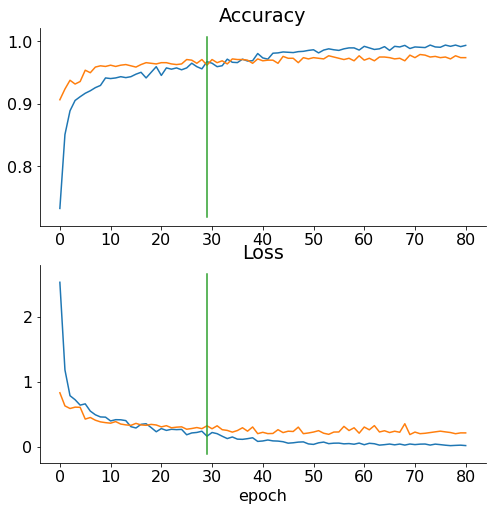

In [31]:
plt.figure(figsize=(8, 8))

# plot accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],    # plot vertical line
          plt.ylim(), label='Start Fine Tuning') # indicating the start of fine-tuning

plt.title('Accuracy')

# plot loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],    # plot vertical line
         plt.ylim(), label='Start Fine Tuning')  # indicating the start of fine-tuning

plt.title('Loss')
plt.xlabel('epoch')
plt.show()

After training you should get the plot that looks similar to this:

$ $
<figure>
    <img src="R5_3.png" width=400/ align='middle'/>
</figure>

We can see that although fine-tuning lead to further overfitting at the end of the training, it has also slightly improved the accuracy on the validation dataset from 0.96 to approximately 0.97. The overfitting of the network is not necessarily a bad thing and may actually indicate that model can be improved by adjusting hyperparameters or adding regularization.

 # Summary
 
- We demonstrated the advantage of transfer learning for smaller data-set applications. By reusing pre-trained model we can get much better accuracy than with classifier trained from scratch.

- While using pre-trained model as feature extractor, the pre-trained model is "frozen" and only the weights of the  newly added classifier gets updated during training. 

- In the case of the small data, feature extraction with image augmentation helps to avoid overfitting but comes at the cost of higher computational power.

- Fine-tuning helps to adjust the weights such that the network is more specific to the new dataset and thus improves performance of the model a bit further.